In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn import svm
import scipy.io
plt.rcParams["figure.figsize"] = (10,5)

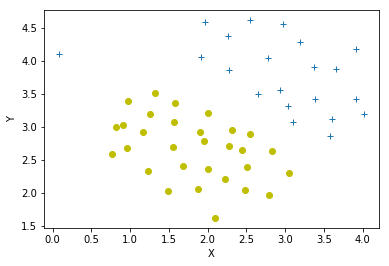

In [2]:
mat = scipy.io.loadmat('./ex6/ex6data1.mat')
X1 = mat.get('X')
y1 = mat.get('y')[:, 0]

plt.plot(X1[y1 == 1, 0], X1[y1 == 1, 1], '+')
plt.plot(X1[y1 == 0, 0], X1[y1 == 0, 1], 'oy')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

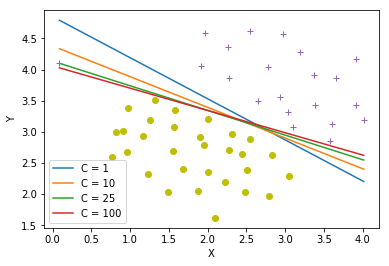

In [3]:
xp = np.linspace(min(X1[:, 0]), max(X1[:, 0]), 100)
for c in [1, 10, 25, 100]:
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(X1, y1) 

    b = clf.intercept_[0]
    w = clf.coef_[0]

    yp = -(w[0] * xp + b)/w[1]

    plt.plot(xp, yp, '-', label="C = %s" % c)

plt.plot(X1[y1 == 1, 0], X1[y1 == 1, 1], '+')
plt.plot(X1[y1 == 0, 0], X1[y1 == 0, 1], 'oy')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

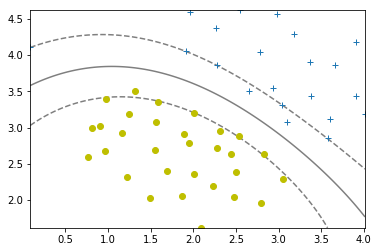

In [15]:
clf = svm.SVC(kernel='rbf', C=10, gamma=0.1)
clf.fit(X1, y1)

U = np.linspace(min(X1[:, 0]), max(X1[:, 0]), 100)
V = np.linspace(min(X1[:, 1]), max(X1[:, 1]), 100)

U_vals, V_vals = np.meshgrid(U, V);

Z = clf.decision_function(np.c_[U_vals.ravel(), V_vals.ravel()])
Z = Z.reshape(U_vals.shape)

plt.plot(X1[y1 == 1, 0], X1[y1 == 1, 1], '+')
plt.plot(X1[y1 == 0, 0], X1[y1 == 0, 1], 'oy')
plt.contour(U_vals, V_vals, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k', alpha=0.5)
plt.show()

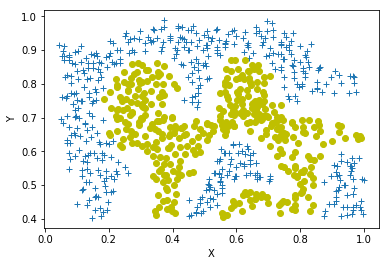

In [5]:
mat = scipy.io.loadmat('./ex6/ex6data2.mat')
X2 = mat.get('X')
y2 = mat.get('y')[:, 0]

plt.plot(X2[y2 == 1, 0], X2[y2 == 1, 1], '+')
plt.plot(X2[y2 == 0, 0], X2[y2 == 0, 1], 'oy')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

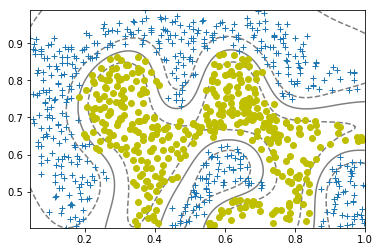

In [17]:
clf = svm.SVC(kernel='rbf', gamma=50)
# clf = svm.OneClassSVM(kernel="rbf", gamma=0.1)
clf.fit(X2, y2)

U = np.linspace(min(X2[:, 0]), max(X2[:, 0]), 100)
V = np.linspace(min(X2[:, 1]), max(X2[:, 1]), 100)

U_vals, V_vals = np.meshgrid(U, V);

Z = clf.decision_function(np.c_[U_vals.ravel(), V_vals.ravel()])
Z = Z.reshape(U_vals.shape)


plt.contour(U_vals, V_vals, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k', alpha=0.5)
plt.plot(X2[y2 == 1, 0], X2[y2 == 1, 1], '+')
plt.plot(X2[y2 == 0, 0], X2[y2 == 0, 1], 'oy')
plt.show()

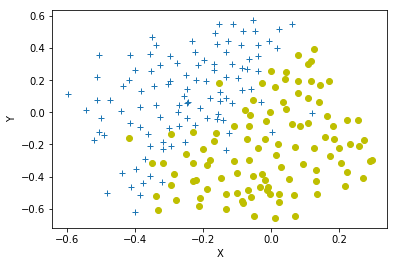

In [7]:
mat = scipy.io.loadmat('./ex6/ex6data3.mat')
X3 = mat.get('X')
y3 = mat.get('y')[:, 0]
X3val = mat.get('Xval')
y3val = mat.get('yval')[:, 0]

plt.plot(X3[y3 == 1, 0], X3[y3 == 1, 1], '+')
plt.plot(X3[y3 == 0, 0], X3[y3 == 0, 1], 'oy')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

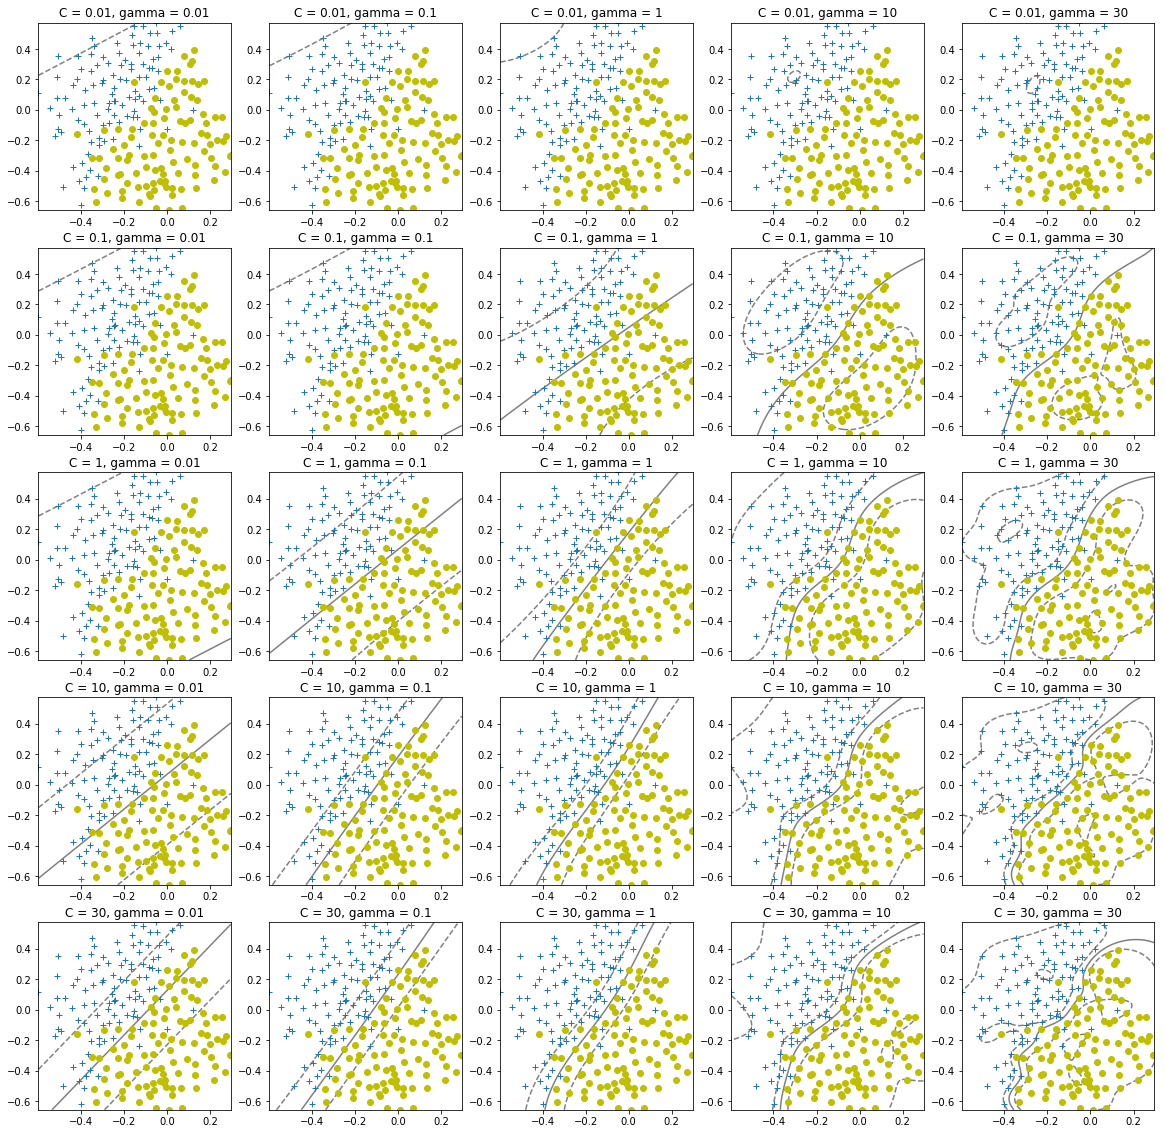

In [8]:
U = np.linspace(min(X3[:, 0]), max(X3[:, 0]), 100)
V = np.linspace(min(X3[:, 1]), max(X3[:, 1]), 100)
U_vals, V_vals = np.meshgrid(U, V);

Cs = [0.01, 0.1, 1, 10, 30]
Gammas = [0.01, 0.1, 1, 10, 30]

for i, c in enumerate(Cs):
    for j, gamma in enumerate(Gammas):
        clf = svm.SVC(kernel='rbf', gamma=gamma, C=c)
        clf.fit(X3, y3)

        Z = clf.decision_function(np.c_[U_vals.ravel(), V_vals.ravel()])
        Z = Z.reshape(U_vals.shape)

        plt.subplot(len(Cs), len(Gammas), i * len(Cs) + j + 1)
        
        plt.contour(U_vals, V_vals, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k', alpha=0.5)
        plt.plot(X3[y3 == 1, 0], X3[y3 == 1, 1], '+')
        plt.plot(X3[y3 == 0, 0], X3[y3 == 0, 1], 'oy')
        plt.title('C = %s, gamma = %s' % (c, gamma))
        
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()

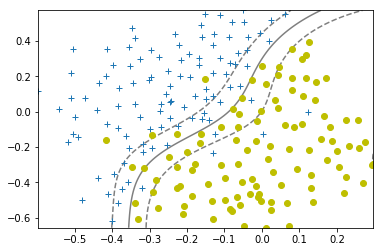

In [9]:
results = []

for c in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
    for gamma in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
        clf = svm.SVC(kernel='rbf', gamma=gamma, C=c)
        clf.fit(X3, y3)
        predictions = clf.predict(X3val)
        prediction_error = np.mean(predictions != y3val)
        results.append([prediction_error, c, gamma])
        
results = np.array(results)
min_index = np.argmin(results[:,0])
_, c_min, gamma_min = results[min_index]


clf = svm.SVC(kernel='rbf', gamma=c_min, C=gamma_min)
clf.fit(X3, y3)

U = np.linspace(min(X3[:, 0]), max(X3[:, 0]), 100)
V = np.linspace(min(X3[:, 1]), max(X3[:, 1]), 100)

U_vals, V_vals = np.meshgrid(U, V);

Z = clf.decision_function(np.c_[U_vals.ravel(), V_vals.ravel()])
Z = Z.reshape(U_vals.shape)

plt.contour(U_vals, V_vals, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k', alpha=0.5)
plt.plot(X3[y3 == 1, 0], X3[y3 == 1, 1], '+')
plt.plot(X3[y3 == 0, 0], X3[y3 == 0, 1], 'oy')
plt.show()